ANSHUM ETANE
Color Identification in Images

In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

The type of this input is <class 'numpy.ndarray'>
Shape: (1080, 1920, 3)


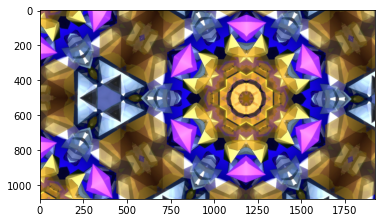

In [5]:
image = cv2.imread('image.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)



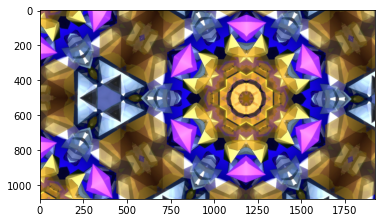

In [6]:
mage = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

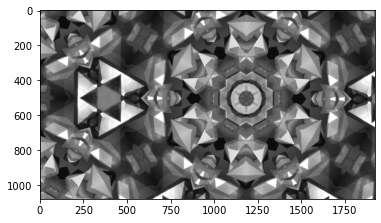

In [7]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

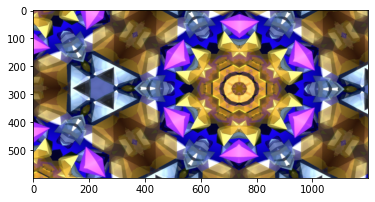

In [8]:
resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)

In [9]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [10]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [38]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
   

    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_

    
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

[array([ 54.15419755, 104.8690312 , 138.3809257 ]),
 array([254.10904541, 123.41413419, 250.82302467]),
 array([57.33625894, 19.62444097, 13.71724061]),
 array([212.85354869,   3.98136357,  20.48089765]),
 array([138.58228446, 245.48222152, 251.88971051]),
 array([251.45535922, 245.11950709, 229.72680772]),
 array([168.42905325, 114.54135195,  96.96456225]),
 array([26.55200241, 46.49922984, 65.98650549]),
 array([250.35209913,  49.08695652, 161.24110672]),
 array([119.81391955, 184.24874578, 206.90458816]),
 array([ 37.92168343,  78.61344703, 105.62547155]),
 array([119.40158993,  72.16123353,  63.12602038]),
 array([143.30445295,   9.97924642,  12.94338102]),
 array([227.65633456, 179.65719557, 152.92570726]),
 array([ 65.59231835, 140.33588114, 174.82162136]),
 array([ 70.83115468, 185.05325587, 233.47494553])]

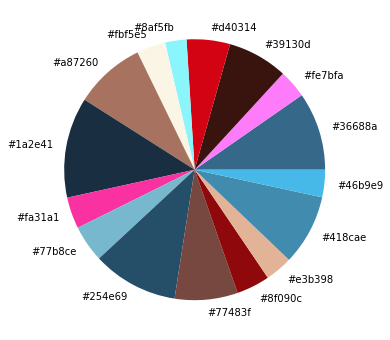

In [39]:
get_colors(get_image('image.jpg'), 16, True)